In [19]:
import matplotlib, pickle
import numpy as np
import matplotlib.pyplot as plt
from pystan import stan

matplotlib.style.use('ggplot')
%matplotlib inline


In [20]:
def generate_data(N,mu1,sigma1,mu2,sigma2):
    return np.random.normal(mu1,sigma1,N)+np.random.normal(mu2,sigma2,N)

In [27]:
stan_code = """
    data {
        int N;
        real G[N];
    }
        
    parameters {
        real mu1;
        real mu2;
        real<lower=0> sigma1;
        real<lower=0> sigma2;
    }
    
    
    model {
        mu1 ~ normal(10,3);
        sigma1 ~ normal(1,0.2);         
        mu2 ~ normal(10,3);
        sigma2 ~ normal(1,0.2);
        
        G ~ normal(mu1,sigma1)+normal(mu2,sigma2);
    }
    
"""

100
100


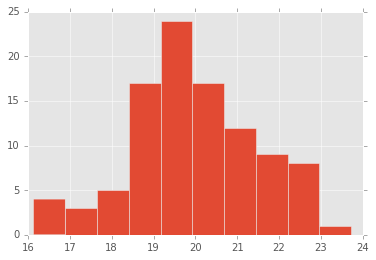

In [28]:
N = 100
mu1 = 10
sigma1 = 1
mu2 = 10
sigma2 = 1

data = generate_data(N,mu1,sigma1,mu2,sigma2)

plt.hist(data)
print N
print data.size

In [29]:
stan_data = {
    'N' : N,
    'G' : data,
}

fit = stan(model_code=stan_code, data=stan_data, iter=1000, chains=4)

ValueError: Failed to parse Stan model 'anon_model_480f78f42da5128f8f0ecc9842170d80'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:


ERROR at line 20

 18:            mu2 ~ normal(10,3);
 19:            sigma2 ~ normal(1,0.2);
 20:            G ~ normal(mu1,sigma1)+normal(mu2,sigma2);
                                      ^
 21:        }

PARSER EXPECTED: ";"


In [30]:
print fit

Inference for Stan model: anon_model_6935de2305ac42f36c4962f3e6c59adf.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      10.0  4.1e-3    0.1   9.82   9.93   10.0  10.07  10.19  567.0    1.0
sigma   0.94  2.8e-3   0.07   0.83   0.89   0.94   0.98   1.08  539.0    1.0
lp__  -42.81    0.06   1.02 -45.91 -43.21  -42.5  -42.1  -41.8  332.0    1.0

Samples were drawn using NUTS(diag_e) at Mon Jul 18 21:53:24 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


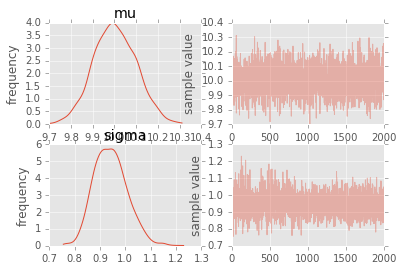

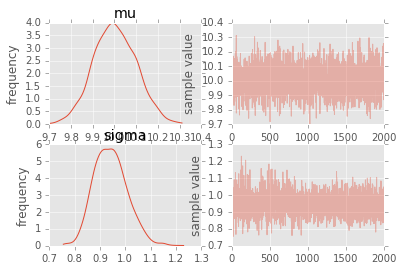

In [14]:
fit.plot()